In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('heart.csv')


In [88]:
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [89]:
df.shape


(299, 13)

In [90]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


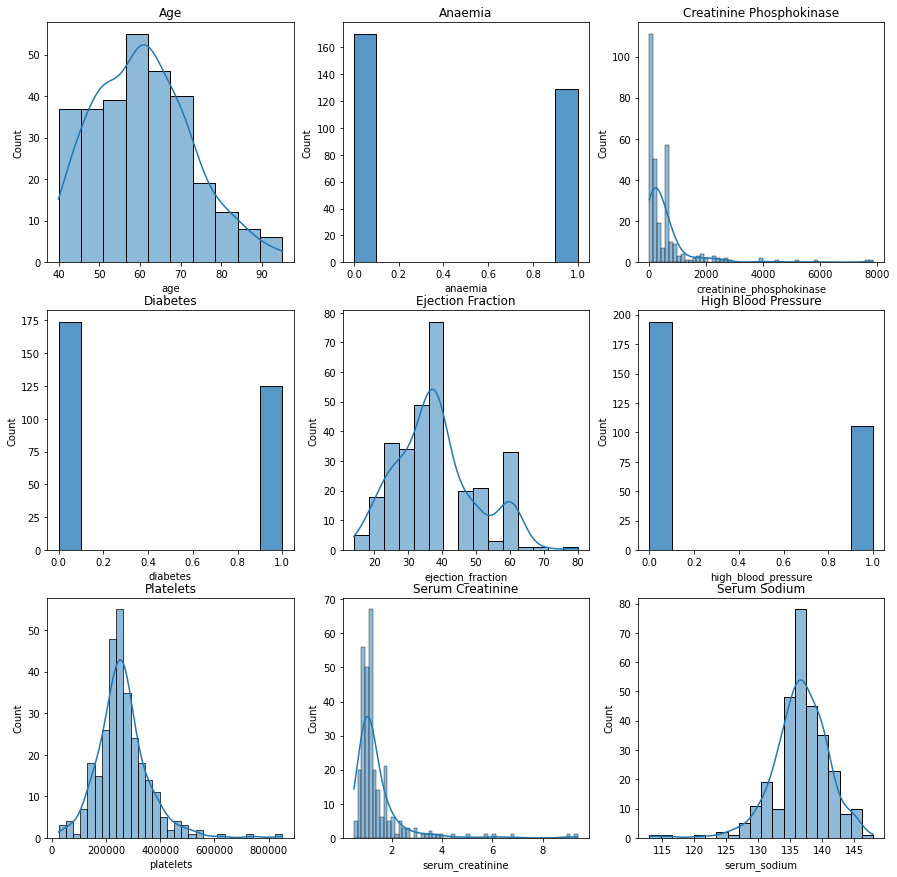

In [91]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

# create histograms for each variable
sns.histplot(data=df, x="age", ax=ax[0, 0], kde=True)
sns.histplot(data=df, x="anaemia", ax=ax[0, 1], kde=False)
sns.histplot(data=df, x="creatinine_phosphokinase", ax=ax[0, 2], kde=True)
sns.histplot(data=df, x="diabetes", ax=ax[1, 0], kde=False)
sns.histplot(data=df, x="ejection_fraction", ax=ax[1, 1], kde=True)
sns.histplot(data=df, x="high_blood_pressure", ax=ax[1, 2], kde=False)
sns.histplot(data=df, x="platelets", ax=ax[2, 0], kde=True)
sns.histplot(data=df, x="serum_creatinine", ax=ax[2, 1], kde=True)
sns.histplot(data=df, x="serum_sodium", ax=ax[2, 2], kde=True)

# set titles for each subplot
ax[0, 0].set_title("Age")
ax[0, 1].set_title("Anaemia")
ax[0, 2].set_title("Creatinine Phosphokinase")
ax[1, 0].set_title("Diabetes")
ax[1, 1].set_title("Ejection Fraction")
ax[1, 2].set_title("High Blood Pressure")
ax[2, 0].set_title("Platelets")
ax[2, 1].set_title("Serum Creatinine")
ax[2, 2].set_title("Serum Sodium")

plt.show()


From the histograms, we can see that some of the variables, such as anaemia, diabetes, and high_blood_pressure, are binary, meaning they only have two values. The other variables have a range of values, but they seem to be relatively normally distributed, with some skewness to the right.

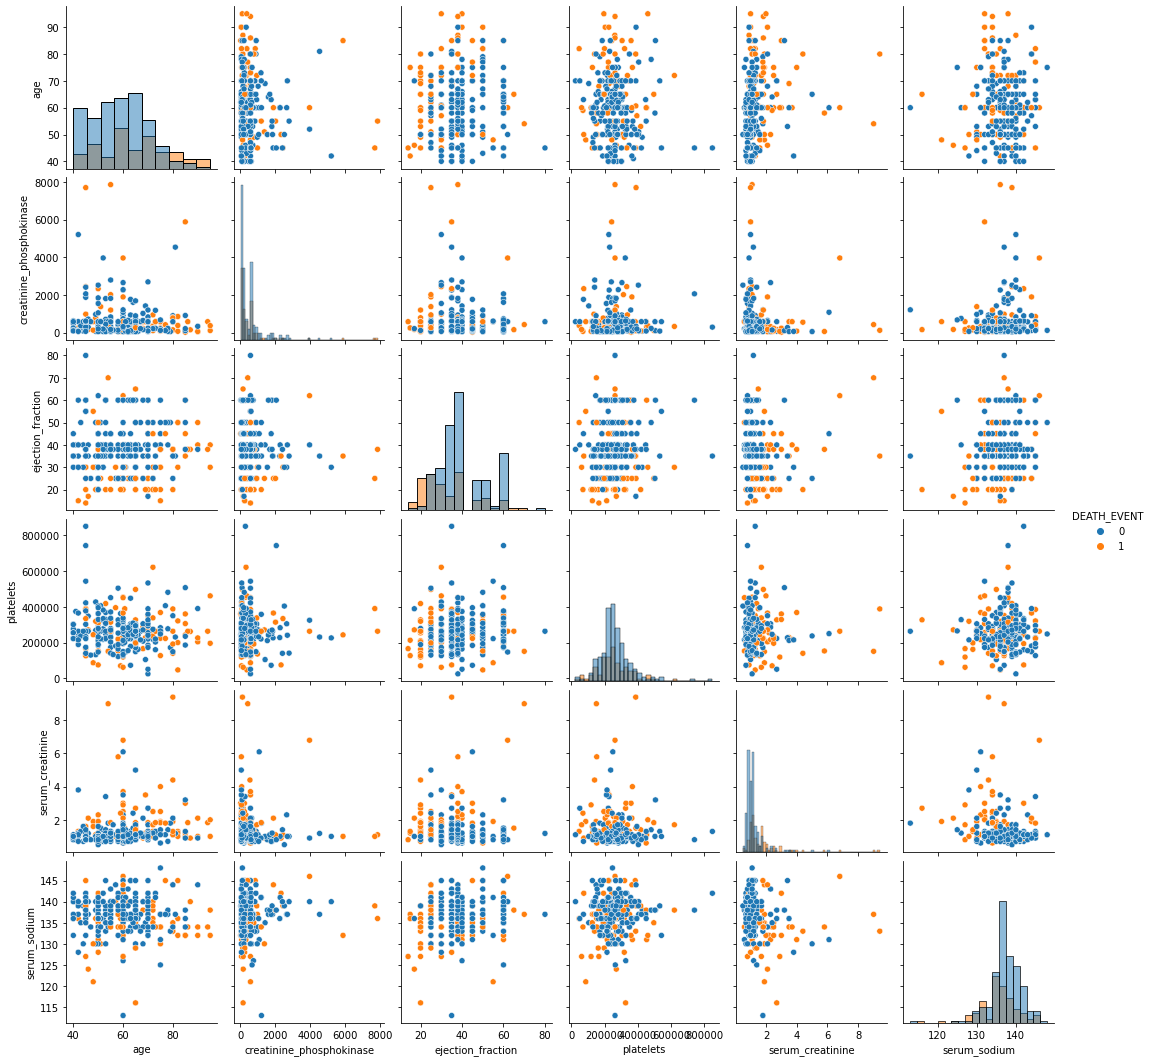

In [92]:
# create scatter plots for each pair of variables
sns.pairplot(data=df, vars=["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"], hue="DEATH_EVENT", diag_kind="hist")
plt.show()


From the scatter plots, we can see that there are some variables that may be predictive of DEATH_EVENT. For example, ejection_fraction seems to be negatively correlated with DEATH_EVENT, meaning that as ejection_fraction decreases, the likelihood of DEATH_EVENT increases. Similarly, serum_creatinine seems to be positively correlated with DEATH_EVENT, meaning that as serum_creatinine increases, the likelihood of DEATH_EVENT also increases.

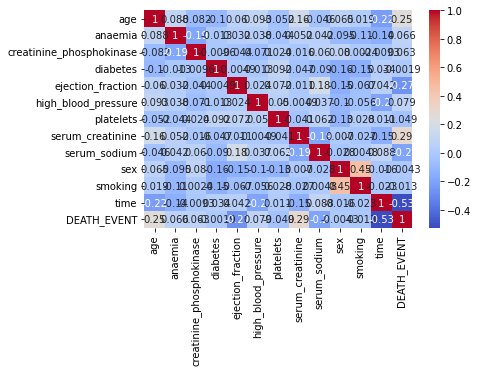

In [93]:
# create a correlation matrix
corr_matrix = df.corr()

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


From the heatmap, we can see that there are several variables that are strongly correlated with the target variable (DEATH_EVENT), including age, serum creatinine, and ejection fraction. There are also several variables that are weakly correlated with the target variable, such as smoking, high blood pressure, and diabetes.

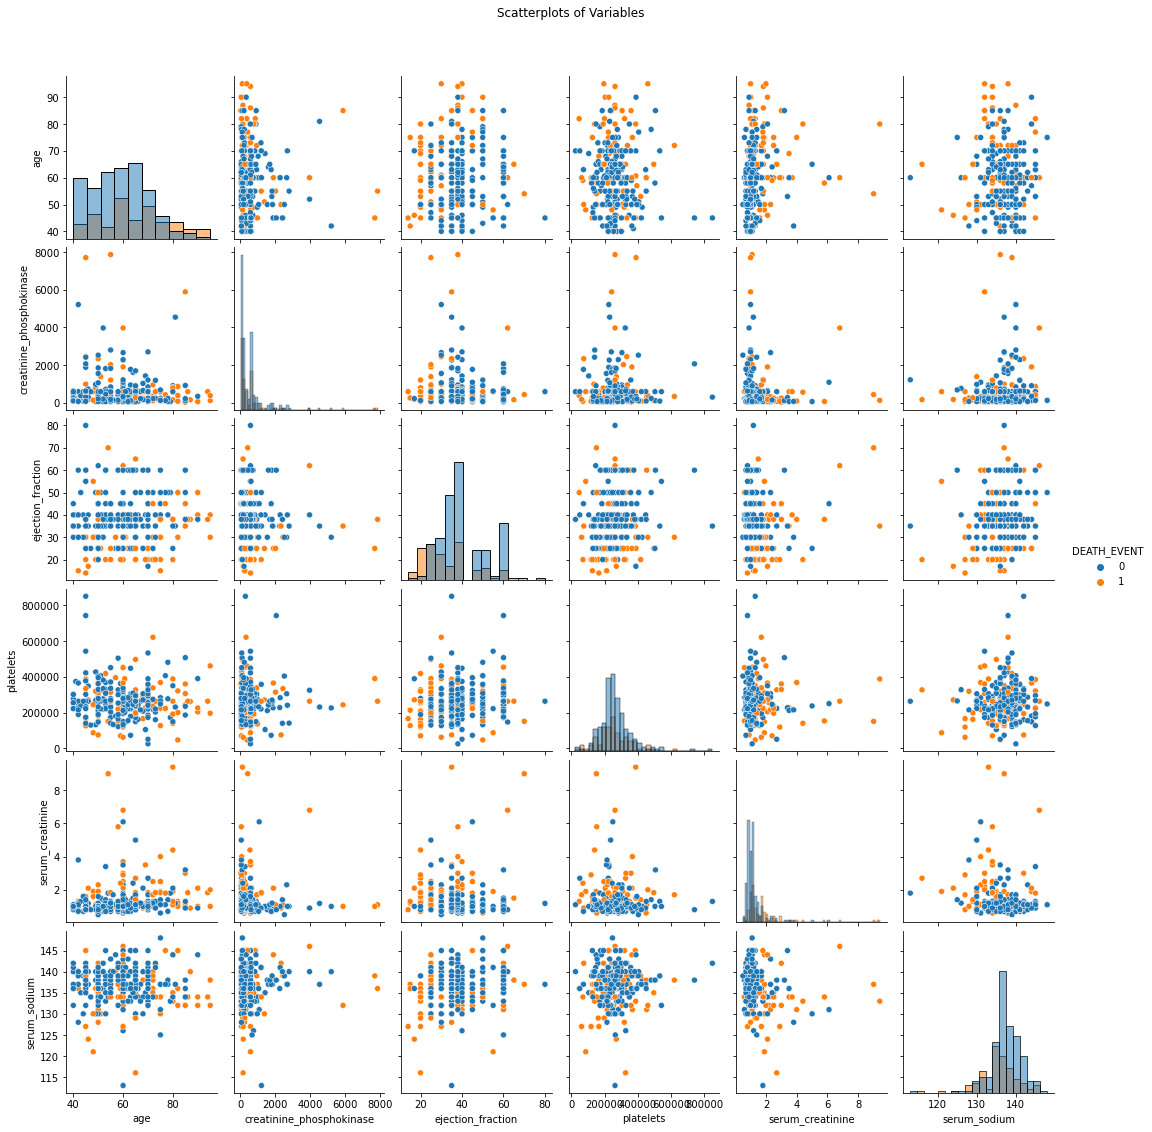

In [94]:
# Create scatterplots
sns.pairplot(df, vars=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'], hue='DEATH_EVENT', diag_kind='hist')
plt.suptitle('Scatterplots of Variables', y=1.05)
plt.show()


From these scatterplots, we can see that there are some variables that have a clear separation between the two classes (DEATH_EVENT=0 and DEATH_EVENT=1), such as ejection fraction and serum creatinine. There are also some variables that have significant overlap between the two classes, such as age and platelets.

In [95]:
# Feature selection using Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=6, step=1)
rfe = rfe.fit(X, y)

print("Selected Features: ")
print(X.columns[rfe.support_])


Selected Features: 
Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'time'],
      dtype='object')


In [96]:
# K Nearest Neighbor (KNN) Algorithm

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluating the KNN model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = knn.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.7555555555555555
Confusion Matrix:
 [[53  6]
 [16 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83        59
           1       0.71      0.48      0.58        31

    accuracy                           0.76        90
   macro avg       0.74      0.69      0.70        90
weighted avg       0.75      0.76      0.74        90



In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [98]:
y_pred_knn = knn.predict(X_test)


In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
confusion = confusion_matrix(y_test, y_pred_knn)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:\n', confusion)


Accuracy: 0.7555555555555555
Precision: 0.7142857142857143
Recall: 0.4838709677419355
F1 Score: 0.5769230769230769
Confusion Matrix:
 [[53  6]
 [16 15]]


In [100]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=40)

# Train the model
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy:", accuracy)


Decision Tree Classifier Accuracy: 0.8222222222222222


In [101]:
# Support Vector Machine (SVM) Classifier
from sklearn.svm import SVC

svm = SVC(random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("SVM Classifier Accuracy:", accuracy)


SVM Classifier Accuracy: 0.8111111111111111


In [102]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=40)

# Train the model
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Classifier Accuracy:", accuracy)


Logistic Regression Classifier Accuracy: 0.8444444444444444


In [103]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=40)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)


Random Forest Classifier Accuracy: 0.8444444444444444


In [104]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=40)

# Train the model
gbc.fit(X_train, y_train)

# Predict on the test set
y_pred = gbc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Classifier Accuracy:", accuracy)


Gradient Boosting Classifier Accuracy: 0.8888888888888888


In [105]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=40)

# Train the model
ada.fit(X_train, y_train)

# Predict on the test set
y_pred = ada.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 0.8666666666666667


In [106]:
# Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Gaussian Naive Bayes Classifier Accuracy:", accuracy)


Gaussian Naive Bayes Classifier Accuracy: 0.7666666666666667
